In [1]:
# !wget https://archive.ics.uci.edu/ml/machine-learning-databases/00231/PAMAP2_Dataset.zip

In [1]:
import numpy as np
import pickle
import torch

In [24]:
_data = []
_label = []
_lens = []
for i in range(1,10):
    with open('./PAMAP2_Dataset/Protocol/subject10'+str(i)+'.dat','r') as f:
        _lines =f.readlines()
    _cnt =0
    for l in _lines:
        lsp = l.replace('NaN','0')
        lsp = lsp.split(' ')
        if int(lsp[1]) == 0:
            continue
        _label.append(int(lsp[1]))
        _data.append([ float(k) for k in lsp[2:]  ])
        _cnt+=1
    _lens.append(_cnt)

        

In [25]:
_data = np.asarray(_data)
_label = np.asarray(_label)



In [26]:
(2/3)*len(_data) #2/3 for train 

1295248.0

In [27]:
np.unique(_label)

array([ 1,  2,  3,  4,  5,  6,  7, 12, 13, 16, 17, 24])

In [28]:
#correct label map 
_label[_label==1] = 0
_label[_label==2] = 1
_label[_label==3] = 2
_label[_label==4] = 3
_label[_label==5] = 4
_label[_label==6] = 5
_label[_label==7] = 6
_label[_label==12] = 7
_label[_label==13] = 8
_label[_label==16] = 9
_label[_label==17] = 10
_label[_label==24] = 11

In [29]:
np.unique(_label)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [30]:
data_dict = {}
_one_hot = []
for k in _label: 
    _arr =[0 for i in range(12)] 
    _arr[k] = 1
    _one_hot.append(_arr)
_one_hot = np.asarray(_one_hot)




In [31]:
_lensx = [] 
_lensx.append(_lens[0])
for i in range(1,len(_lens)):
    _lensx.append(_lens[i] + _lensx[i-1])
print(_lens,_lensx)

[249957, 263349, 174338, 231421, 272442, 250096, 232776, 262102, 6391] [249957, 513306, 687644, 919065, 1191507, 1441603, 1674379, 1936481, 1942872]


In [66]:
prevk = 0

for k in _lensx: 
    twothirds = int((2/3)*k)
    endthird = k- twothirds
    
    print(prevk,twothirds,'|',twothirds,k)
    prevk = k

0 166638 | 166638 249957
249957 342204 | 342204 513306
513306 458429 | 458429 687644
687644 612710 | 612710 919065
919065 794338 | 794338 1191507
1191507 961068 | 961068 1441603
1441603 1116252 | 1116252 1674379
1674379 1290987 | 1290987 1936481
1936481 1295248 | 1295248 1942872


In [75]:
0%2 

0

In [108]:
_label_train = []
_label_test = []
_one_hot_train = []
_one_hot_test = []
_data_train = [] 
_data_test = []
prevk = 0
for k in _lensx: 
    if prevk%2 == 0:

        twothirds = int((2/3)*k)
        endthird = k- twothirds
    else:
        twothirds = k-1
        endthird = k
    _label_train.append(_label[prevk:twothirds])
    _label_test.append(_label[twothirds:k])
    _one_hot_train.append(_one_hot[prevk:twothirds])
    _one_hot_test.append(_one_hot[twothirds:k])
    
    _data_train.append(_data[prevk:twothirds])
    _data_test.append(_data[twothirds:k])
    prevk = k 

In [109]:
_one_hot_test[0].shape,_data_test[0].shape

((83319, 12), (83319, 52))

In [110]:
_label_train = np.concatenate(_label_train)
_label_test = np.concatenate(_label_test)

_one_hot_train = np.concatenate(_one_hot_train)
_one_hot_test = np.concatenate(_one_hot_test)

_data_train = np.concatenate(_data_train)
_data_test = np.concatenate(_data_test)


In [111]:
np.unique(_label_train),np.unique(_label_test),len(_label_train),len(_label_test)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 1453788,
 618895)

In [112]:
_data_train.shape,_data_test.shape

((1453788, 52), (618895, 52))

In [113]:
data_dict['Y_train'] = torch.from_numpy(_label_train[:,None,None]).type(torch.long)
data_dict['Y_train_onehot'] = torch.from_numpy(_one_hot_train[:,None,:]).type(torch.float)
data_dict['Y_test'] = torch.from_numpy(_label_test[:,None,None]).type(torch.long)
data_dict['Y_test_onehot'] = torch.from_numpy(_one_hot_test[:,None,:]).type(torch.float)

In [114]:
# _data_train = _data[:1915022]
# _data_test = _data[1915022:]


In [115]:
for i in range(_data_train.shape[1]): 
    _mean = _data_train[:,i].mean()
    _std = _data_train[:,i].std()
    _data_train[:,i]= (_data_train[:,i]-_mean)/_std
    _data_test[:,i]= (_data_test[:,i]-_mean)/_std


In [118]:

data_dict['X_train'] = torch.from_numpy(_data_train[:,None,:]).type(torch.float)
data_dict['X_test']  = torch.from_numpy(_data_test[:,None,:]).type(torch.float)



In [119]:
with open("./PAMP.pkl","wb") as f:
    pickle.dump(data_dict,f)

In [13]:
# 1timestamp
# (s)–2activityID 
# (see II.2. for the mapping to the activities)–3heart rate (bpm)–4-20IMU hand–21-37IMU chest–38-54IMU ankle

In [16]:
data_dict['X_train'].dtype

torch.float64

In [11]:
data_dict['Y_train'].dtype

torch.int64

In [17]:
data_dict['Y_train_onehot'].dtype

torch.int64

In [17]:
import torch

In [18]:
torch.long

torch.int64

In [16]:
data_dict['X_train'].shape

torch.Size([1915022, 1, 52])

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([377711., 189931., 238761.,  85546., 164600., 188107., 117216.,
        104944., 175353., 272853.]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <a list of 10 Patch objects>)

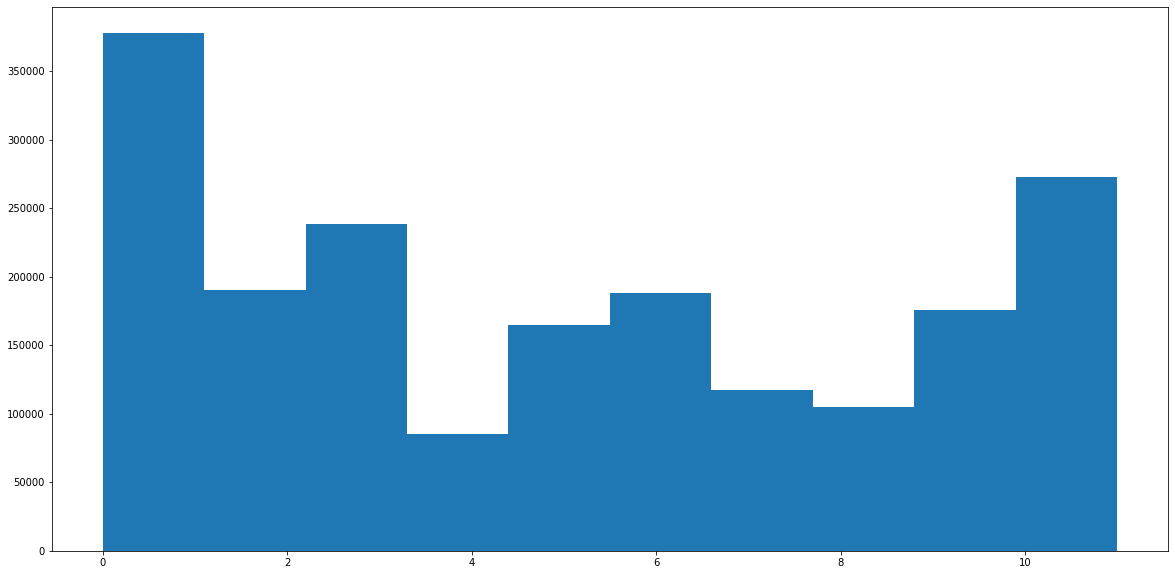

In [30]:
plt.figure(figsize=(20,10))
plt.hist(data_dict['Y_train'].squeeze())

In [18]:
data_dict['Y_train_onehot'].shape

torch.Size([1915022, 1, 12])

In [19]:
12+52

64